# Explore here

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [5]:
# Your code here
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
datos_vinos = pd.read_csv(url, sep=";")
datos_vinos.head()  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
datos_vinos.shape

(1599, 12)

In [7]:
datos_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
datos_vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


He probado mis datos, aqui es posible que mi dataset pueda haber datos duplicados, ya que en registros de vinos, es muy posible que se puedan duplicar. Asi que no deberia eliminar duplicados.

In [9]:
duplicados = datos_vinos.duplicated()
total_duplicados = duplicados.sum()
print(f"Total duplicados: {total_duplicados}")  

Total duplicados: 240


In [10]:
campos = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

for campo in campos:
    duplicados = datos_vinos[campo].duplicated().sum()
    print(f"Valores duplicados en '{campo}': {duplicados}")

Valores duplicados en 'fixed acidity': 1503
Valores duplicados en 'volatile acidity': 1456
Valores duplicados en 'citric acid': 1519
Valores duplicados en 'residual sugar': 1508
Valores duplicados en 'chlorides': 1446
Valores duplicados en 'free sulfur dioxide': 1539
Valores duplicados en 'total sulfur dioxide': 1455
Valores duplicados en 'density': 1163
Valores duplicados en 'pH': 1510
Valores duplicados en 'sulphates': 1503
Valores duplicados en 'alcohol': 1534


In [11]:
datos_vinos.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
datos_vinos.duplicated().sum()

np.int64(240)

In [13]:
datos_vinos["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Asigno la calidad para el valor columna label, segun la calidad le aplico un valor.

In [14]:
def asignaCalidad(x):
    if x == 3 or x == 4 or x == 5:
        return 0
    elif x == 6:
        return 1
    else:
        return 2

datos_vinos['label'] = datos_vinos['quality'].apply(asignaCalidad)

In [15]:
datos_vinos['label'].value_counts()

label
0    744
1    638
2    217
Name: count, dtype: int64

In [16]:
datos_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  label                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [17]:
datos_vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


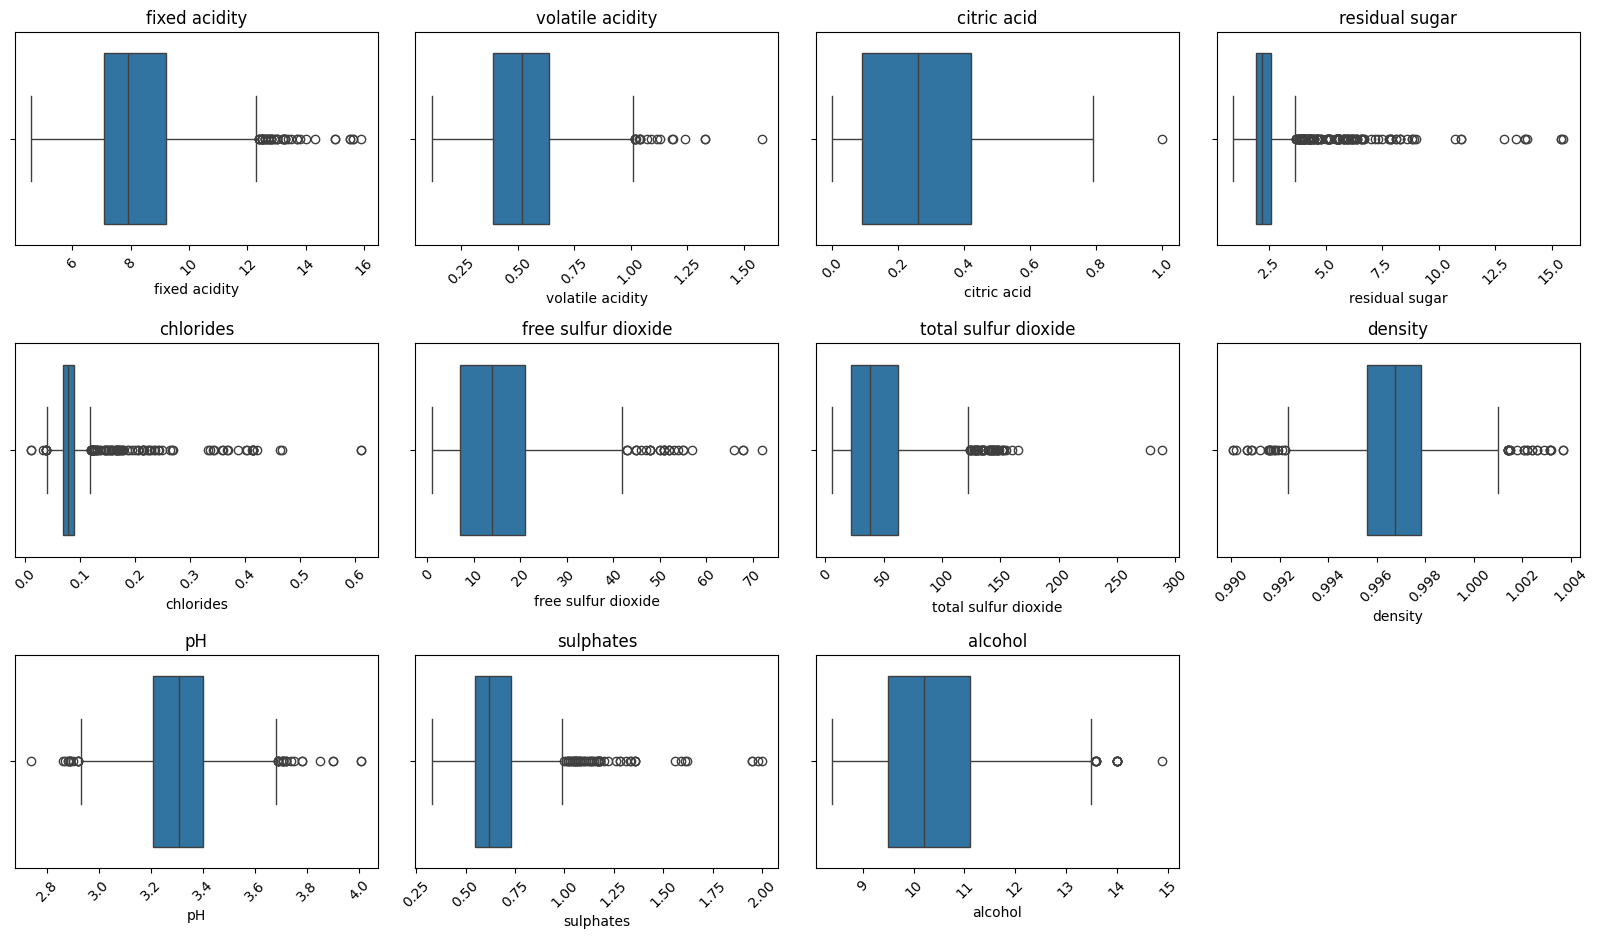

In [18]:
fig, axis = plt.subplots(4, 4, figsize=(16, 12))

# Lista de variables
variables = [col for col in datos_vinos.columns if col not in ['quality', 'label']]

# Crear los boxplots en la cuadrícula de subgráficos
for i, var in enumerate(datos_vinos.columns):
    row = i // 4  # Determina la fila
    col = i % 4   # Determina la columna
    sns.boxplot(ax=axis[row, col], data=datos_vinos, x=var)
    axis[row, col].set_title(var)
    axis[row, col].tick_params(axis='x', rotation=45)
    
# Eliminar la última fila de subgráficos vacíos (en caso de que no se necesiten)
for i in range(len(variables), 16):
    fig.delaxes(axis[i // 4, i % 4])
plt.tight_layout()

plt.show()

Estuve buscando información sobre valores que podrían considerarse despreciables. Según los parámetros disponibles, estos valores podrían utilizarse como posibles outliers, en mi opinion.

In [19]:
total_residual_sugar = datos_vinos[datos_vinos['residual sugar'] < 0.6].shape[0]
print(f"Total de filas con total residual sugar < 0.6: {total_residual_sugar}")

Total de filas con total residual sugar < 0.6: 0


In [20]:
total_sulfur_dioxide = datos_vinos[datos_vinos['total sulfur dioxide'] < 10].shape[0]
print(f"Total de filas con total sulfur dioxide < 10: {total_sulfur_dioxide}")

Total de filas con total sulfur dioxide < 10: 35


In [21]:
total_chlorides = datos_vinos[datos_vinos['chlorides'] > 0.3].shape[0]
print(f"Total de filas con chlorides > 0.3: {total_chlorides}")

Total de filas con chlorides > 0.3: 22


In [22]:
total_volatile_acidity = datos_vinos[datos_vinos['volatile acidity'] > 1.2].shape[0]
print(f"Total de filas con volatile acidity > 1.2: {total_volatile_acidity}")

Total de filas con volatile acidity > 1.2: 4


In [23]:
# Filas con alcohol < 8%
outliers_bajos = datos_vinos[datos_vinos['alcohol'] >= 8]

# Filas con alcohol > 14%
outliers_altos = datos_vinos[datos_vinos['alcohol'] <= 14]

# Total de outliers
total_outliers = outliers_bajos.shape[0] + outliers_altos.shape[0]

print(f"Total de filas con alcohol < 8%: {outliers_bajos.shape[0]}")
print(f"Total de filas con alcohol > 14%: {outliers_altos.shape[0]}")
print(f"Total de outliers en alcohol (<8 o >14): {total_outliers}")

Total de filas con alcohol < 8%: 1599
Total de filas con alcohol > 14%: 1598
Total de outliers en alcohol (<8 o >14): 3197


Aplico los filtros para los outliers de estas columnas para realizar mis pruebas.

In [24]:
datos_vinos_filtrado = datos_vinos.copy()

# Aplicamos los filtros para eliminar los outliers
datos_vinos_filtrado = datos_vinos_filtrado[
    (datos_vinos_filtrado['residual sugar'] > 0.6) &
    (datos_vinos_filtrado['total sulfur dioxide'] >= 10) &
    (datos_vinos_filtrado['chlorides'] <= 0.3) &
    (datos_vinos_filtrado['volatile acidity'] <= 1.2) &
    (datos_vinos_filtrado['alcohol'] >= 8) &
    (datos_vinos_filtrado['alcohol'] <= 14)
]

# Mostramos la cantidad de filas restantes
print(f"Filas originales: {datos_vinos.shape[0]}")
print(f"Filas después de filtrar outliers: {datos_vinos_filtrado.shape[0]}")

Filas originales: 1599
Filas después de filtrar outliers: 1538


In [25]:
datos_vinos_filtrado.shape

(1538, 13)

In [26]:
datos_vinos_filtrado.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'label'],
      dtype='object')

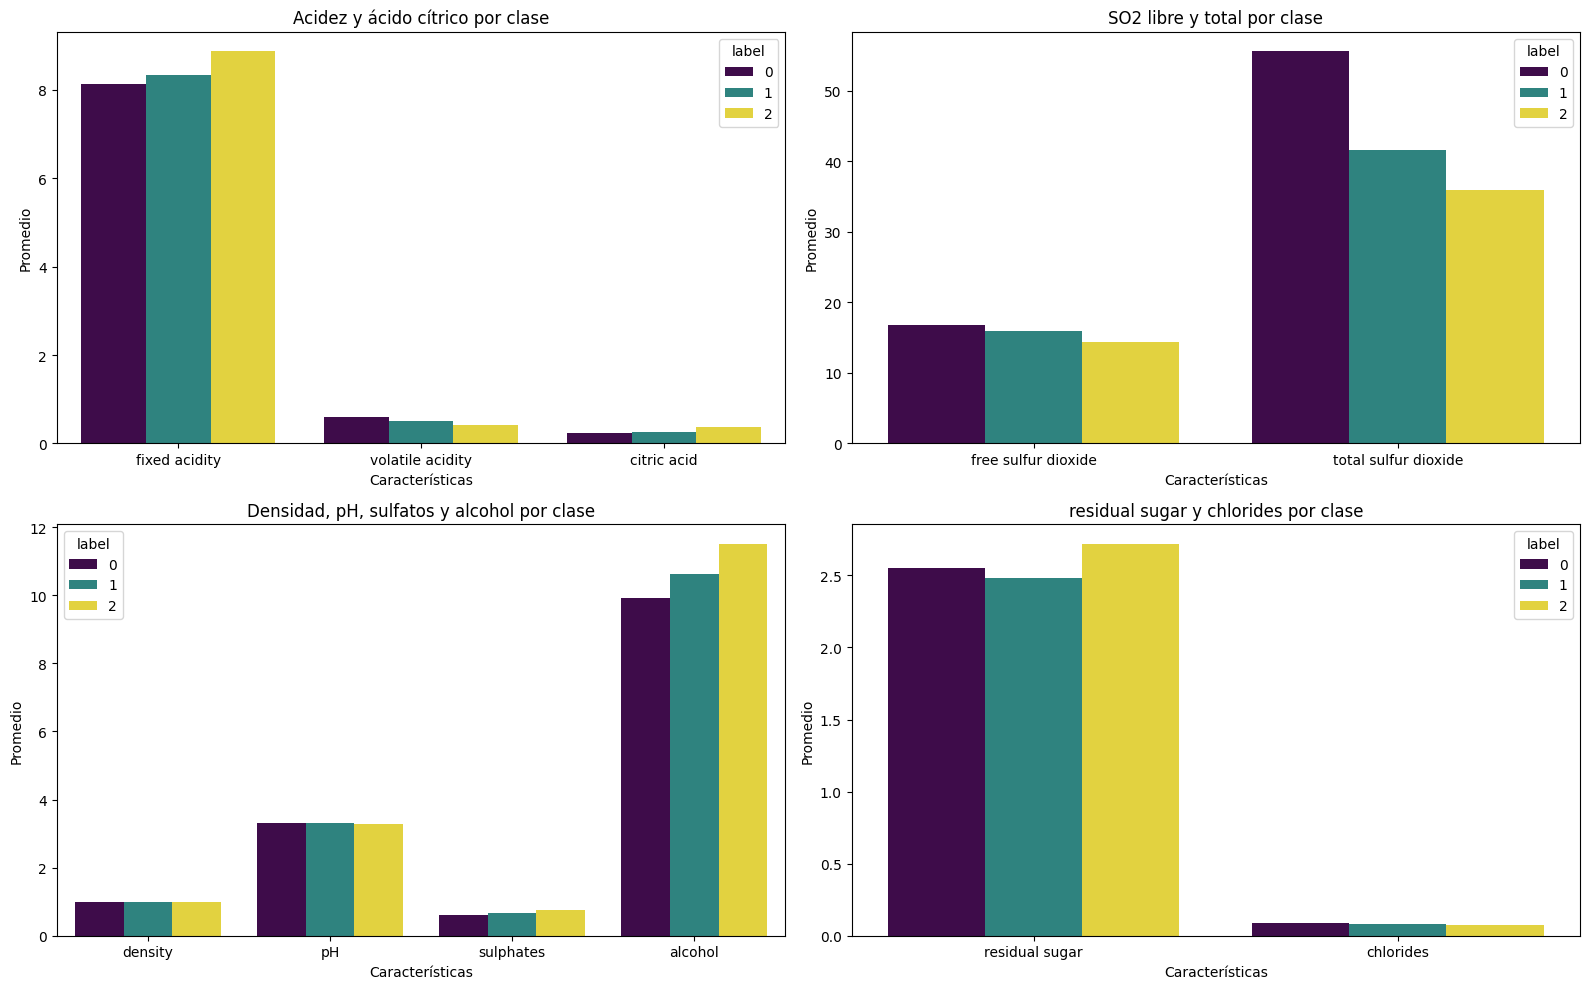

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4)

# Primer gráfico
cols1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'label']
grouped_means1 = datos_vinos_filtrado[cols1].groupby('label').mean().reset_index()
df_melted1 = grouped_means1.melt(id_vars='label', var_name='Característica', value_name='Promedio')
sns.barplot(data=df_melted1, x='Característica', y='Promedio', hue='label', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title("Acidez y ácido cítrico por clase")
axes[0, 0].set_xlabel("Características")
axes[0, 0].set_ylabel("Promedio")

# Segundo gráfico
cols2 = ['free sulfur dioxide', 'total sulfur dioxide', 'label']
grouped_means2 = datos_vinos_filtrado[cols2].groupby('label').mean().reset_index()
df_melted2 = grouped_means2.melt(id_vars='label', var_name='Característica', value_name='Promedio')
sns.barplot(data=df_melted2, x='Característica', y='Promedio', hue='label', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title("SO2 libre y total por clase")
axes[0, 1].set_xlabel("Características")
axes[0, 1].set_ylabel("Promedio")

# Tercer gráfico
cols3 = ['density', 'pH', 'sulphates', 'alcohol', 'label']
grouped_means3 = datos_vinos_filtrado[cols3].groupby('label').mean().reset_index()
df_melted3 = grouped_means3.melt(id_vars='label', var_name='Característica', value_name='Promedio')
sns.barplot(data=df_melted3, x='Característica', y='Promedio', hue='label', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title("Densidad, pH, sulfatos y alcohol por clase")
axes[1, 0].set_xlabel("Características")
axes[1, 0].set_ylabel("Promedio")

# Cuarto gráfico (vacío)
cols4 = ['residual sugar', 'chlorides', 'label']
grouped_means4 = datos_vinos_filtrado[cols4].groupby('label').mean().reset_index()
df_melted4 = grouped_means4.melt(id_vars='label', var_name='Característica', value_name='Promedio')
sns.barplot(data=df_melted4, x='Característica', y='Promedio', hue='label', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title("residual sugar y chlorides por clase")
axes[1, 1].set_xlabel("Características")
axes[1, 1].set_ylabel("Promedio")
plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler

features = datos_vinos_filtrado.drop(columns=['label','quality'])

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(features)
total_data_scal = pd.DataFrame(scal_features, index=datos_vinos_filtrado.index, columns=features.columns)
total_data_scal["label"] = datos_vinos_filtrado["label"]
total_data_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,0.254545,0.544601,0.000000,0.068493,0.248062,0.140845,0.086022,0.567548,0.565217,0.106918,0.178571,0
1,0.290909,0.713615,0.000000,0.116438,0.333333,0.338028,0.204301,0.494126,0.295652,0.182390,0.250000,0
2,0.290909,0.600939,0.050633,0.095890,0.310078,0.197183,0.157706,0.508811,0.347826,0.163522,0.250000,0
3,0.600000,0.150235,0.708861,0.068493,0.244186,0.225352,0.179211,0.582232,0.260870,0.119497,0.250000,1
4,0.254545,0.544601,0.000000,0.068493,0.248062,0.140845,0.086022,0.567548,0.565217,0.106918,0.178571,0


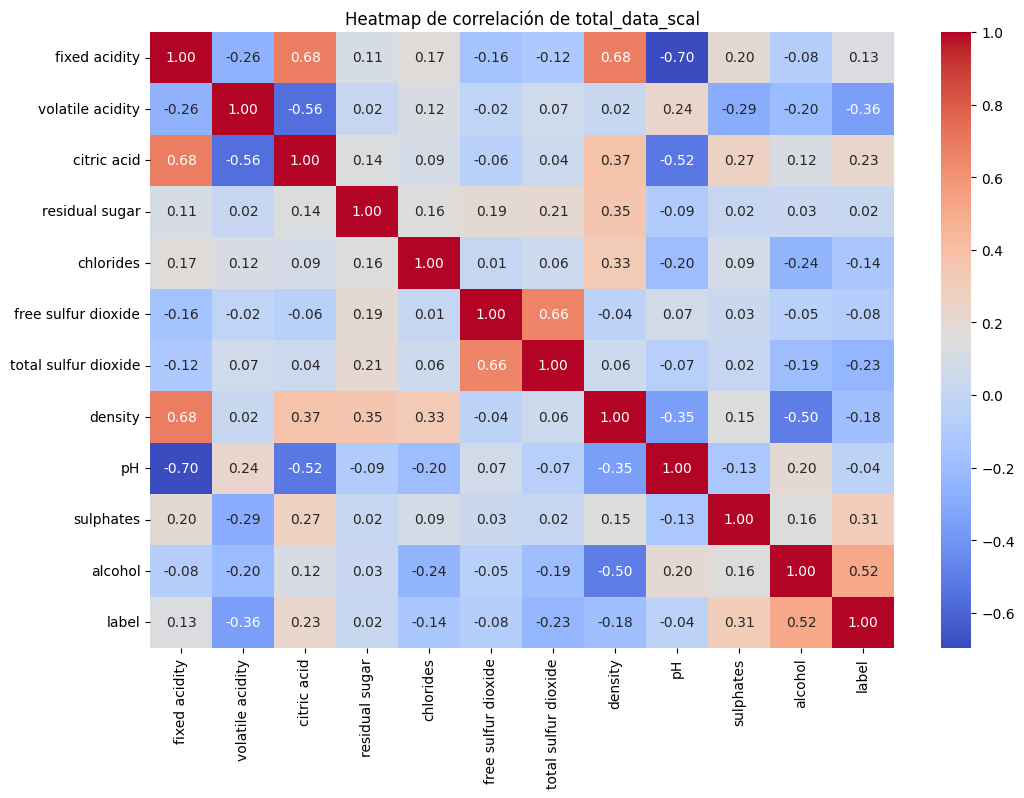

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(total_data_scal.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de correlación de total_data_scal")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
X = total_data_scal.drop(["label"], axis = 1)
y = total_data_scal["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
207,0.290909,0.422535,0.392405,0.061644,0.220930,0.352113,0.394265,0.453744,0.373913,0.088050,0.160714
1248,0.209091,0.272300,0.417722,0.089041,0.267442,0.295775,0.093190,0.354626,0.478261,0.226415,0.482143
1348,0.236364,0.502347,0.037975,0.061644,0.255814,0.084507,0.007168,0.425844,0.417391,0.000000,0.196429
86,0.363636,0.347418,0.354430,0.068493,0.379845,0.267606,0.451613,0.523495,0.060870,0.981132,0.267857
1500,0.263636,0.568075,0.050633,0.041096,0.248062,0.098592,0.017921,0.367841,0.347826,0.088050,0.214286


In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNNmodel = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
KNNmodel.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [32]:
y_pred = KNNmodel.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2,
       1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1,
       0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2,
       0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0,

In [33]:
y_pred_train = KNNmodel.predict(X_train)
y_pred_train

array([0, 1, 0, ..., 0, 1, 1], shape=(1230,))

In [34]:
print(f"Precision en test: ", accuracy_score(y_test, y_pred))
print(f"Precision en train: ", accuracy_score(y_train, y_pred_train))
print(f"Matriz de confusión:\n", confusion_matrix(y_train, y_pred_train))
print(f"Reporte de clasificación:\n", classification_report(y_train, y_pred_train))

Precision en test:  0.6461038961038961
Precision en train:  0.7113821138211383
Matriz de confusión:
 [[445 123   9]
 [107 348  38]
 [ 20  58  82]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       577
           1       0.66      0.71      0.68       493
           2       0.64      0.51      0.57       160

    accuracy                           0.71      1230
   macro avg       0.69      0.66      0.67      1230
weighted avg       0.71      0.71      0.71      1230



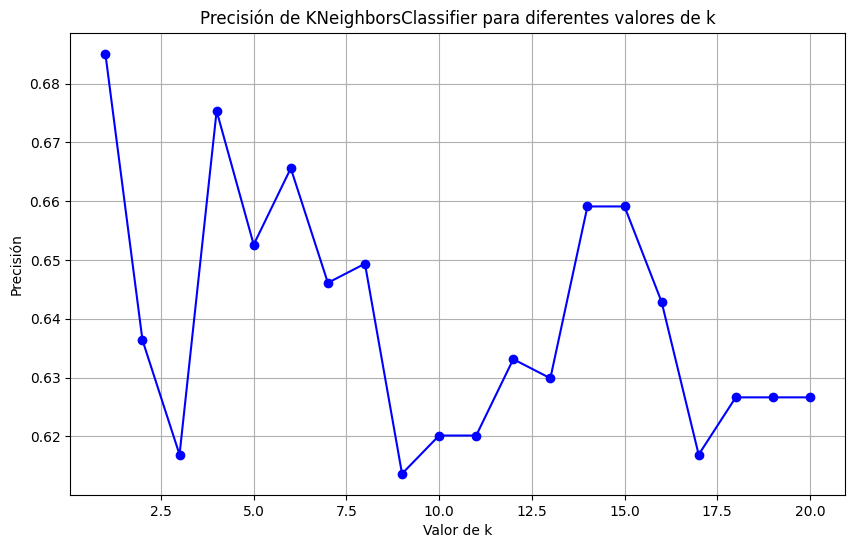

[0.685064935064935, 0.6363636363636364, 0.6168831168831169, 0.6753246753246753, 0.6525974025974026, 0.6655844155844156, 0.6461038961038961, 0.6493506493506493, 0.6136363636363636, 0.6201298701298701, 0.6201298701298701, 0.6331168831168831, 0.6298701298701299, 0.6590909090909091, 0.6590909090909091, 0.6428571428571429, 0.6168831168831169, 0.6266233766233766, 0.6266233766233766, 0.6266233766233766]
El mejor valor de k es 1 con una precisión de 0.69


In [36]:
precisions = []
# Bucle para probar diferentes valores de k (de 1 a 20)
for k in range(1, 21):
    # Crear el clasificador KNN con el valor actual de k
    knn = KNeighborsClassifier(n_neighbors=k)
    # Entreno el clasificador
    knn.fit(X_train, y_train)
    # Hacer predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)
    # Calculo la precisión
    accuracy = accuracy_score(y_test, y_pred)
    # Almaceno la precisión para este valor de k
    precisions.append(accuracy)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), precisions, marker='o', linestyle='-', color='b')
plt.title('Precisión de KNeighborsClassifier para diferentes valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

print(f'{precisions}')
# Mostrar el valor de k que da la mejor precisión
best_k = precisions.index(max(precisions)) + 1
print(f'El mejor valor de k es {best_k} con una precisión de {max(precisions):.2f}')

In [37]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(final_knn, '../models/modelo_final_knn.sav')

print("Modelo guardado exitosamente en 'modelo_final_knn.sav'")

Modelo guardado exitosamente en 'modelo_final_knn.sav'


In [ ]:
# Guardar el modelo entrenado en un archivo
dump(scaler, '../models/modelo_scaler.sav')

print("Modelo guardado exitosamente en 'modelo_scaler.sav'")

Modelo guardado exitosamente en 'modelo_scaler.sav'


Esta parte tengo duda, porque he mirado el codigo, no sabria como hacer este apartado, que se le pasen valores enteros sin escalar creando una funcion y entiendo segun el label es una calidad u otra. Los transformas los valores a enteros normales, o los que se le pasa llamando a la funcion, los escalo y predice.

In [39]:
def predict_wine_quality(features):
    features_scaled = scaler.transform([features])
    pred = final_knn.predict(features_scaled)[0]
    if pred == 0:
        return "Este vino probablemente sea de baja calidad 🍷"
    elif pred == 1:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de alta calidad 🍷"

In [40]:
resultado = predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])
print(resultado)

Este vino probablemente sea de baja calidad 🍷
